In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [55]:
def F(FA, TR, T1, T2, PD, n: np.ndarray):
    E1 = np.exp(-TR/T1)
    E2 = np.exp(-TR/T2)
    A = 1-E1*np.cos(FA)
    B = E1-E1*np.cos(FA)
    a = E2*(B-A)/(A-B*E2**2)
    # b = (np.sqrt(1-a**2)-1)/a
    # c = PD*(1-E1)*np.sin(FA)/((A-B*(E2**2))*np.sqrt(1-a**2))

    return PD*(1-E1)*np.sin(FA)/((A-B*(E2**2))*np.sqrt(1-a**2))*(((np.sqrt(1-a**2)-1)/a)**np.abs(n)-E2*((np.sqrt(1-a**2)-1)/a)**np.abs(n+1))



def S(F, T2, T2_dash, omega_0, TR, TE: np.ndarray, n: np.ndarray):
    assert len(F) == len(TE) and len(F) == len(
        n), "F, TE and n must be of same length"
    return F*np.exp(-TE/T2)*np.exp(-np.abs(TE+TR*n)/T2_dash)*np.exp(1j*omega_0*(TE+TR*n))

def S_magnitude(FA, TR, TE_0, delta_TE, T1, T2, PD, T2_dash, n):
    E1 = np.exp(-TR/T1)
    E2 = np.exp(-TR/T2)
    A = 1-E1*np.cos(FA)
    B = E1-E1*np.cos(FA)
    a = E2*(B-A)/(A-B*E2**2)
    b = (np.sqrt(1-a**2)-1)/a
    c = PD*(1-E1)*np.sin(FA)/((A-B*(E2**2))*np.sqrt(1-a**2))

    log_S = np.zeros(len(n))
    for idx, n_, in enumerate(n):
        if n_>= 0:
            log_S[idx] = np.log(c*(1-E2*b)) - TE_0/T2 - TE_0/T2_dash + n_*(np.log(b)-delta_TE/T2-(delta_TE+TR)/T2_dash)
            # log_S[idx] = np.log(c*(1-E2*b))  + n_*(np.log(b))
        else:
            log_S[idx] = np.log(-c*(1-E2*b**(-1))) - TE_0/T2 + TE_0/T2_dash + n_*(-np.log(b)-delta_TE/T2+(delta_TE+TR)/T2_dash)
            # log_S[idx] = np.log(-c*(1-E2*b**(-1))) + n_*(-np.log(b))

    return np.exp(log_S)

In [56]:
# 3T Gray Matter
param_GM = {
    "PD": 0.8,
    "T1": 1.56,
    "T2": 0.083,
    "T2_dash": 0.32
}
# 3T White Matter
param_WM = {
    "PD": 0.7,
    "T1": 0.83,
    "T2": 0.075,
    "T2'": 0.18,
}
# 3T CSF
param_CSF = {
    "PD": 1,
    "T1": 4.16,
    "T2": 1.65,
    "T2'": 0.059,
}
# 3T Fat
param_FAT = {
    "PD": 1,
    "T1": 0.37,
    "T2": 0.125,
    "T2'": 0.012,
}

[0.008  0.0082 0.0084 0.0086 0.0088 0.009  0.0092 0.0094 0.0096 0.0098
 0.01   0.0102 0.0104 0.0106 0.0108 0.011  0.0112 0.0114 0.0116 0.0118
 0.012 ]


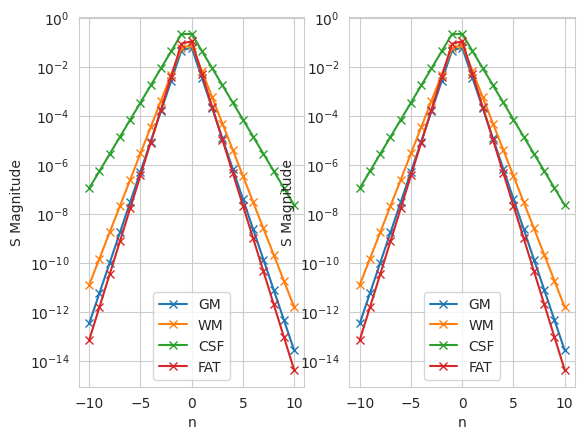

In [57]:
FA = np.deg2rad(35)
n_start = +10
n_end = -10
n = np.linspace(n_start, n_end, np.abs(n_end-n_start)+1, endpoint=True)
TR = 20e-3
TE_0 = 10e-3
delta_TE = -2e-4
TE = n*delta_TE+TE_0
print(TE)

F_GM = F(FA, TR, param_GM["T1"], param_GM["T2"], param_GM["PD"], n)
F_WM = F(FA, TR, param_WM["T1"], param_WM["T2"], param_WM["PD"], n)
F_CSF = F(FA, TR, param_CSF["T1"], param_CSF["T2"], param_CSF["PD"], n)
F_FAT = F(FA, TR, param_FAT["T1"], param_FAT["T2"], param_FAT["PD"], n)

S_GM = S(F_GM, param_GM["T2"], param_GM["T2_dash"], 0, TR, TE, n)
S_WM = S(F_WM, param_WM["T2"], param_WM["T2'"], 0, TR, TE, n)
S_CSF = S(F_CSF, param_CSF["T2"], param_CSF["T2'"], 0, TR, TE, n)
S_FAT = S(F_FAT, param_FAT["T2"], param_FAT["T2'"], 0, TR, TE, n)

S2_GM = S_magnitude(FA, TR, TE_0, delta_TE, param_GM["T1"], param_GM["T2"], param_GM["PD"], param_GM["T2_dash"], n)
S2_WM = S_magnitude(FA, TR, TE_0, delta_TE, param_WM["T1"], param_WM["T2"], param_WM["PD"], param_WM["T2'"], n)
S2_CSF = S_magnitude(FA, TR, TE_0, delta_TE, param_CSF["T1"], param_CSF["T2"], param_CSF["PD"], param_CSF["T2'"], n)
S2_FAT = S_magnitude(FA, TR, TE_0, delta_TE, param_FAT["T1"], param_FAT["T2"], param_FAT["PD"], param_FAT["T2'"], n)

plt.subplot(1, 2, 1)
plt.plot(n, np.abs(S_GM), label="GM", marker="x")
plt.plot(n, np.abs(S_WM), label="WM", marker="x")
plt.plot(n, np.abs(S_CSF), label="CSF", marker="x")
plt.plot(n, np.abs(S_FAT), label="FAT", marker="x")
plt.xlabel("n")
plt.ylabel("S Magnitude")
plt.yscale("log")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n, np.abs(S2_GM), label="GM", marker="x")
plt.plot(n, np.abs(S2_WM), label="WM", marker="x")
plt.plot(n, np.abs(S2_CSF), label="CSF", marker="x")
plt.plot(n, np.abs(S2_FAT), label="FAT", marker="x")
plt.xlabel("n")
plt.ylabel("S Magnitude")
plt.yscale("log")
plt.legend()
plt.show()
